# Task 4: Frequency Filtering

In [ ]:
# Importing required modules
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib as mpl

In [ ]:
# Defining path to images
images_path = '/content/images/'

### Exercise 1

Image 1 resolution is 1280x879


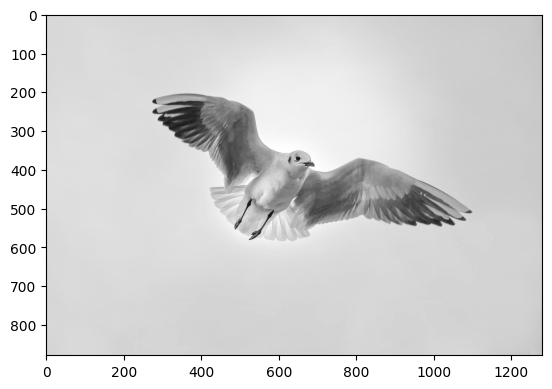

In [ ]:
# Reading image with OpenCV
image_1_name = 'img1.jpg'
image_1 = cv2.imread(images_path + image_1_name)

# Getting basic image info
image_1_height, image_1_width, image_1_color_channels = image_1.shape
print("Image 1 resolution is {}x{}".format(image_1_width, image_1_height))

# Converting image to grayscale and displaying on the screen
image_1_grayscale = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
plt.imshow(image_1_grayscale, cmap = 'gray')
plt.show()

(6831.004246867675-1906.875492496486j)


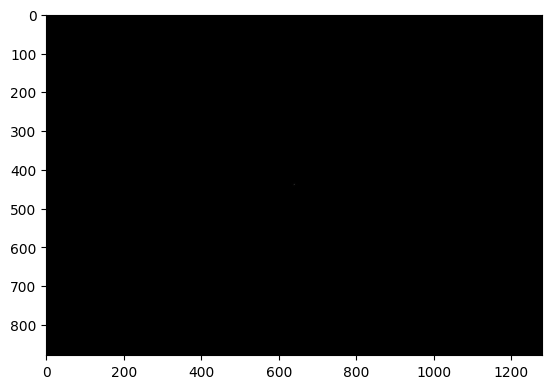

Min magnitude value:  2.1500483729861677
Max magnitude value:  233949777.0


In [ ]:
# Performing fast Fourier transformation
image_1_ft = np.fft.fft2(image_1_grayscale)

# Printing value for pixel located at row 169 and column 451
print(image_1_ft[521, 1151])

# Shifting component corresponding to zero frequency to the center
image_1_ft_shifted = np.fft.fftshift(image_1_ft)

# To visualize Fourier transform, we replace all matrix elements by their absolute values, i.e. magnitudes
image_1_magnitude_spectrum = np.abs(image_1_ft_shifted)
plt.imshow(image_1_magnitude_spectrum, cmap = 'gray')
plt.show()

# Printing min and max values of magnitudes
print('Min magnitude value: ', np.min(image_1_magnitude_spectrum))
print('Max magnitude value: ', np.max(image_1_magnitude_spectrum))

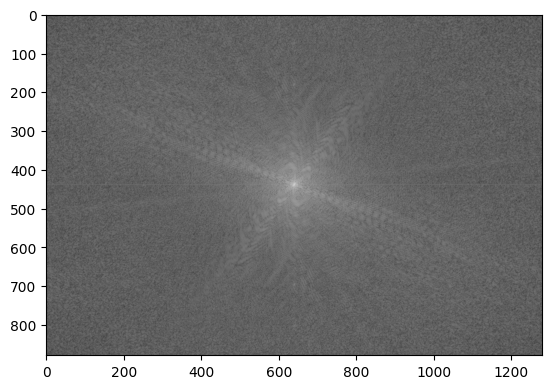

Difference between maximum and minimum values:  18.12319921713216


In [ ]:
# Changing magnitude spectrum to logarithmic scale
image_1_magnitude_spectrum = np.log(1+np.abs(image_1_ft_shifted))
plt.imshow(image_1_magnitude_spectrum, cmap = 'gray')
plt.show()

# Calculating difference between max and min values
print('Difference between maximum and minimum values: ', np.max(image_1_magnitude_spectrum)-np.min(image_1_magnitude_spectrum))

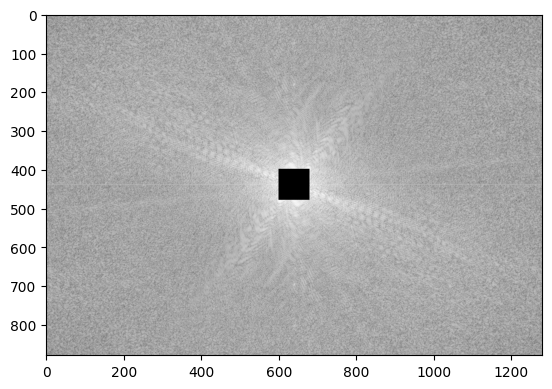

In [ ]:
# Removing the main low frequencies by setting their magnitudes to zero. Matrix is 80x80
image_1_ft_shifted[int(image_1_height/2)-40 : int(image_1_height/2)+40, int(image_1_width/2)-40 : int(image_1_width/2)+40] = 0
image_1_magnitude_spectrum = np.log(1+np.abs(image_1_ft_shifted))
plt.imshow(image_1_magnitude_spectrum, cmap = 'gray')
plt.show()

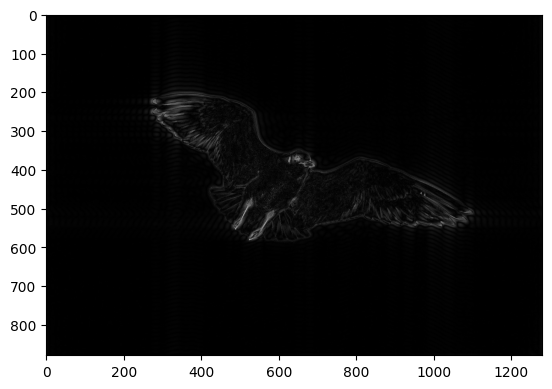

Magnitude value at row 613 and column 459 is: 0.26431887912818486


In [ ]:
# Performing inverse fast Fourier transformation
image_1_ift = np.fft.ifftshift(image_1_ft_shifted)
image_1_back = np.fft.ifft2(image_1_ift)
image_1_back = np.abs(image_1_back)
plt.imshow(image_1_back, cmap = 'gray')
plt.show()

# Getting magnitude values at row 613 and column 459
print('Magnitude value at row 613 and column 459 is: {}'.format(image_1_back[661][449]))

### Exercise 2

Image 2 resolution is 1280x720


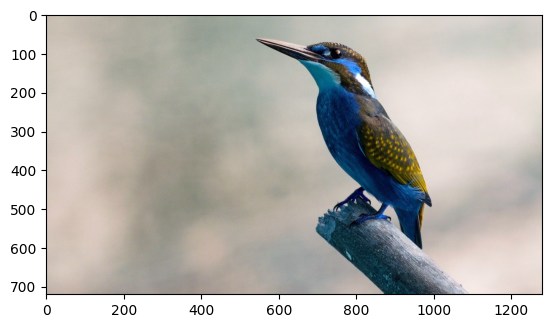

In [ ]:
# Reading image with OpenCV
image_2_name = 'img2.jpg'
image_2 = cv2.imread(images_path + image_2_name)

# Getting basic image info
image_2_height, image_2_width, image_2_color_channels = image_2.shape
print("Image 2 resolution is {}x{}".format(image_2_width, image_2_height))

# Displaying image on the screen
plt.imshow(image_2)
plt.show()

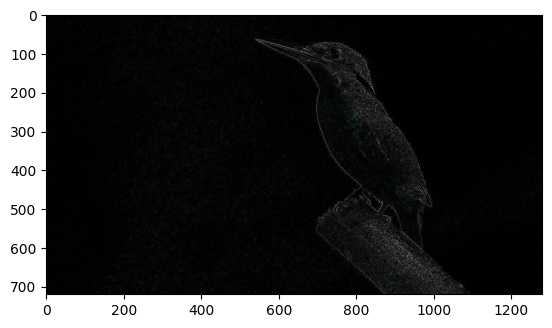

Sum of all gradients is: 14568364


In [ ]:
# Calculating image gradients and displying intensities on the screen
image_2_gradients = cv2.Laplacian(image_2, -1)
plt.imshow(image_2_gradients)
plt.show()

# Calculating sum of all gradients
print('Sum of all gradients is: {}'.format(image_2_gradients.sum()))

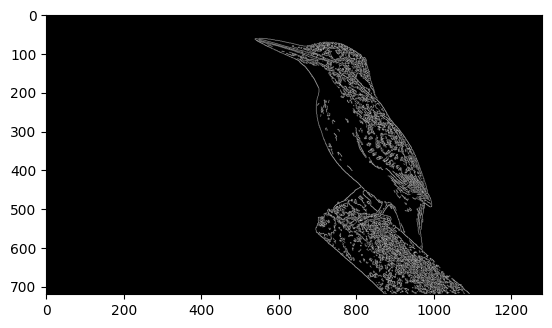

Sum of all edge's intensities is: 6370155


In [ ]:
# Detecting edges using Canny edge dector
image_2_canny_edge = cv2.Canny(image_2, 100, 200)
plt.imshow(image_2_canny_edge, cmap = 'gray')
plt.show()

# Calculating sum of determined edges intesity
print("Sum of all edge's intensities is: {}".format(image_2_canny_edge.sum()))